# Monte Carlo Basics

This notebook introduces a brief review of statistics and some Monte Carlo sampling basics.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Variance

This example samples the binomial distribution many times and calculates the mean and variance.  You can think of this example as a coin flip with one side having a value of 1 and the other a value of 0, and the number of coins (10 in example below) are summed together.  This process has an analytical solution that we can compare to and illustrate sample mean and sample variance.

In [5]:
n, p = 10, .5  # number of trials, probability of each trial
n_batches = 30
s = np.random.binomial(n, p, n_batches)

This is the sample space of the 30 trials.

In [6]:
s

array([4, 5, 3, 5, 6, 5, 6, 4, 5, 4, 7, 3, 3, 7, 7, 8, 4, 4, 4, 5, 4, 2,
       4, 6, 4, 2, 6, 5, 6, 7])

We can see here that the sample mean doesn't match the true mean exactly.  If however we increased the number of batches, we will converge towards to the true mean (law of large numbers).

In [7]:
sample_mean = np.mean(s)
true_mean = n*p
print(sample_mean)
print(true_mean)

4.833333333333333
5.0


Same can be said about the variance of the population which will converge to the true variance as we increase the number of samples.

In [8]:
sample_variance = np.var(s)
true_variance = n*p*(1-p)
print(sample_variance)
print(true_variance)

2.2722222222222226
2.5


We can also calculate the variance of mean (instead of the population) or the standard deviation of the mean which allows us to calculate confidence intervals of the mean.

In [9]:
variance_mean = np.var(s)/(n_batches-1)
print(variance_mean)
print(np.sqrt(variance_mean))

0.07835249042145595
0.2799151486101743


## Random Number

Monte Carlo methods rely on random numbers to sample from distributions, however true random numbers are not entirely desirable since they make it impossible to debug code.  It should also be noted that a number is not random, but the sequence of numbers is random.

In [1]:
np.random.rand()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


NameError: name 'np' is not defined

In [11]:
np.random.rand(10)

array([0.11501229, 0.69532152, 0.51102409, 0.62267739, 0.43785485,
       0.07438605, 0.30244422, 0.66626349, 0.42030828, 0.45312965])

We instead use pseudo-random number generators that create a sequence of numbers that can appear to be random.  This allows for a reproducible sequence when we set the seed (i.e. starting point).

In [12]:
np.random.seed(2)

In [13]:
np.random.seed(2)
print(np.random.rand(10))

[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467 0.26682728]


## Direct Sampling

Direct sampling is the best way to sample a PDF and will be demonstrated here for the path sampling distribution.

In [14]:
Sigma_t = 1.5
real_mean = 1 / Sigma_t
print(real_mean)

0.6666666666666666


Once again, we will sample many trials (10000 in example below) and compute the sample space s from which we can evaluate the mean and the variance of the mean.  The sample mean matches well with the mean free path calculated analytically.

In [16]:
nt = 10000
s = -np.log(np.random.rand(nt))/Sigma_t
s_mean = np.mean(s)
s_varmean = np.var(s)/(nt-1)
print(s_mean)
print(s_varmean)
print(np.sqrt(s_varmean))

0.6569427843187259
4.29095845090634e-05
0.006550540779894695


If we plot the sample space, we see that the results reproduce the initial PDF.

(array([3.178e+03, 2.207e+03, 1.415e+03, 9.730e+02, 7.030e+02, 4.860e+02,
        3.540e+02, 2.150e+02, 1.520e+02, 9.200e+01, 6.700e+01, 5.300e+01,
        4.000e+01, 2.000e+01, 1.500e+01, 7.000e+00, 7.000e+00, 7.000e+00,
        4.000e+00, 1.000e+00]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

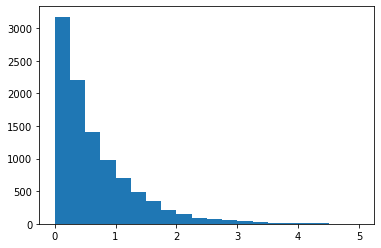

In [17]:
plt.hist(s,bins=[0, 0.25, 0.5, 0.75,1,1.25, 1.5, 1.75, 2.0,2.25, 2.5,2.75, 3.0, 3.25,3.5, 3.75, 4.0,4.25, 4.5, 4.75,5.0])

## Rejection Sampling

An alternative to direct sampling is called rejection sampling.  It is usually a last resort since it can get very costly.  We will demonstrate it's use on the path sampling with a small modification since we need to truncate the infinite tail of the distribution.

In [42]:
x = np.linspace(0,5,1000)
p = Sigma_t * np.exp(-Sigma_t*x)

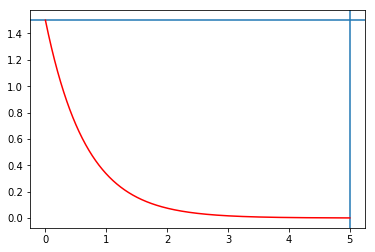

In [43]:
plt.axhline(y=Sigma_t)
plt.axvline(x=5.0)
plt.plot(x,p,'r')

We will randomly sample an x and y value from the blue box from the above figure and determine if our sample falls below or above the red line.  If it falls below, we accept the sample.

In [18]:
x_rnd = np.random.rand(500)*5
y_rnd = np.random.rand(500)*Sigma_t
accept = np.zeros(500)


In [19]:
for i in range(500):
    #print(y_rnd[i],Sigma_t * np.exp(-Sigma_t*x_rnd[i]))
    if y_rnd[i] < Sigma_t * np.exp(-Sigma_t*x_rnd[i]):
        accept[i] = 1

The number of accepted samples is proportional to the ratio of the areas (area under red curve to area of the blue box).

In [21]:
n_nz = np.sum(accept)
print(n_nz)

71.0


In [22]:
nz = np.nonzero(accept)[0]
x_rs = np.zeros(int(n_nz))
y_rs = np.zeros(int(n_nz))

In [23]:
for i in range(int(n_nz)):
    x_rs[i] = x_rnd[nz[i]]
    y_rs[i] = Sigma_t * np.exp(-Sigma_t*x_rnd[nz[i]])

If we plot the distribution of accepted samples, we can see the same path samplig PDF but many more trials would be needed to get a smooth distribution.

(array([19., 23.,  8.,  4.,  4.,  2.,  2.,  3.,  3.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

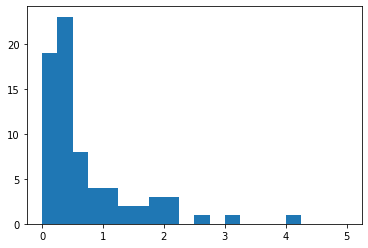

In [25]:
plt.hist(x_rs,bins=[0, 0.25, 0.5, 0.75,1,1.25, 1.5, 1.75, 2.0,2.25, 2.5,2.75, 3.0, 3.25,3.5, 3.75, 4.0,4.25, 4.5, 4.75,5.0])

In [26]:
rs_mean = np.mean(x_rs)
print(rs_mean)

0.7251798441808204


In [28]:
rs_varmean = np.var(x_rs)/int(n_nz)
print(rs_varmean)
print(np.sqrt(rs_varmean))

0.008728084009059799
0.09342421532482785
